# Split dataset tests

In [1]:
# Allow reloading of libraries without restarting the kernel
%load_ext autoreload
%autoreload 2

## Raw dataset

/tmp/xpython_721686/1761532475.py:12: DtypeWarning: Columns (2,3,4,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_csv)


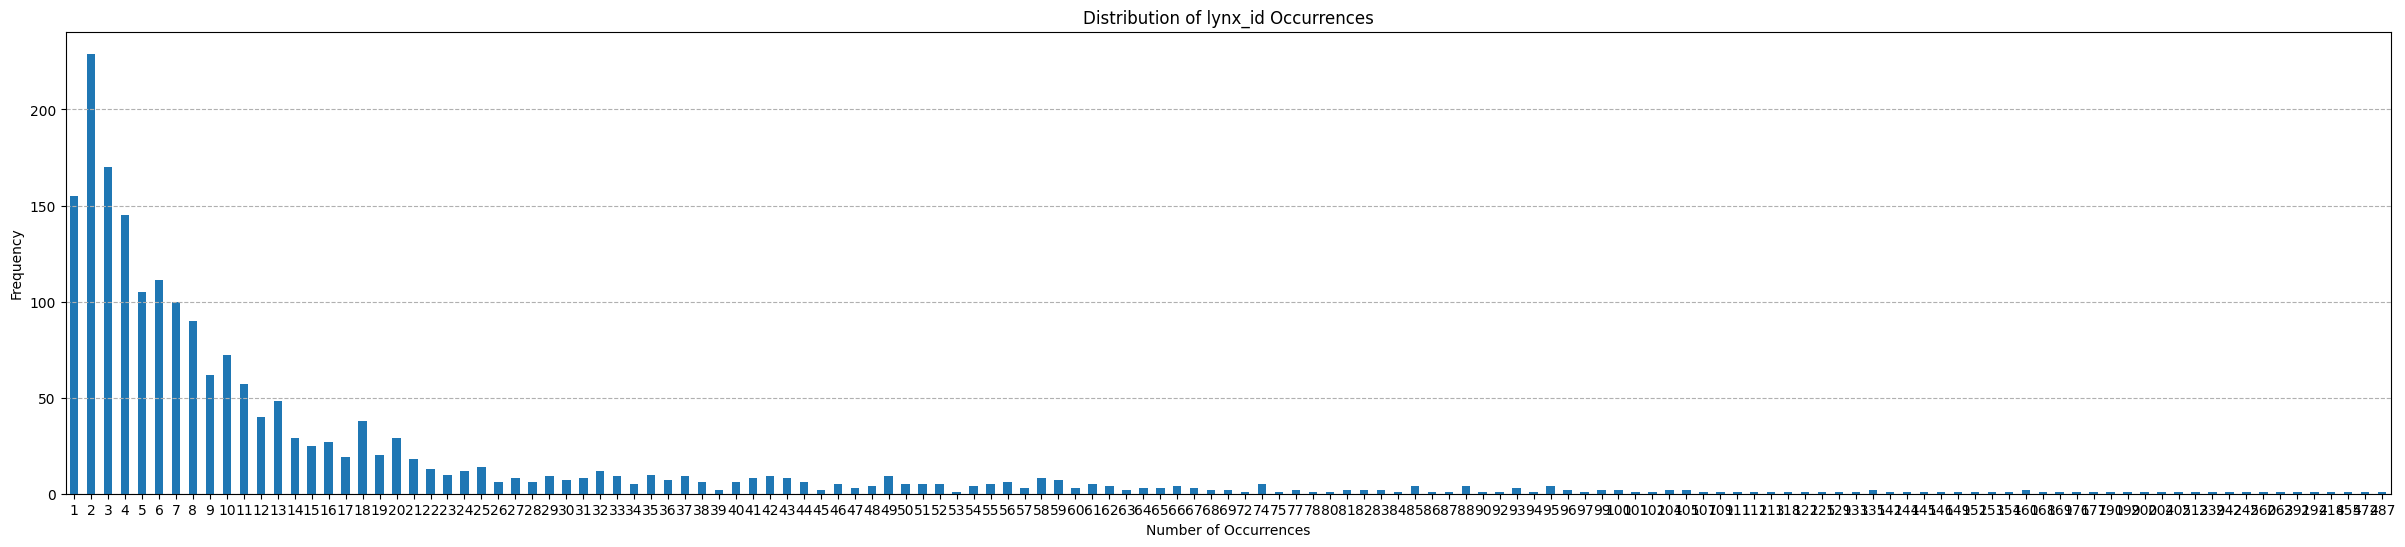

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from lynx_id.utils.split_dataset import plot_occurrence_distribution

# Define the path
dataset_csv = Path('/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/lynx_dataset_full_v2.csv')

# Check if the file exists before attempting to load it
if dataset_csv.is_file():
    # Load the CSV file into a DataFrame
    df = pd.read_csv(dataset_csv)
    # Display the first few rows to understand its features
    display = df.head()
    # Also list all column names to see the features explicitly
    features = df.columns.tolist()
else:
    display = "File does not exist at the specified path."
    features = []

#display, features
plot_occurrence_distribution(df, 'lynx_id')

## Splitting the csv

### Naive split

/gpfsdswork/projects/rech/ads/uxp55sd/DP-SCR_Identify-and-estimate-density-lynx-population/lynx_id/utils/split_dataset.py:36: DtypeWarning: Columns (2,3,4,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_csv_path)


Number of samples in the training set: 25020
Number of samples in the validation set: 5361
Number of samples in the test set: 5363


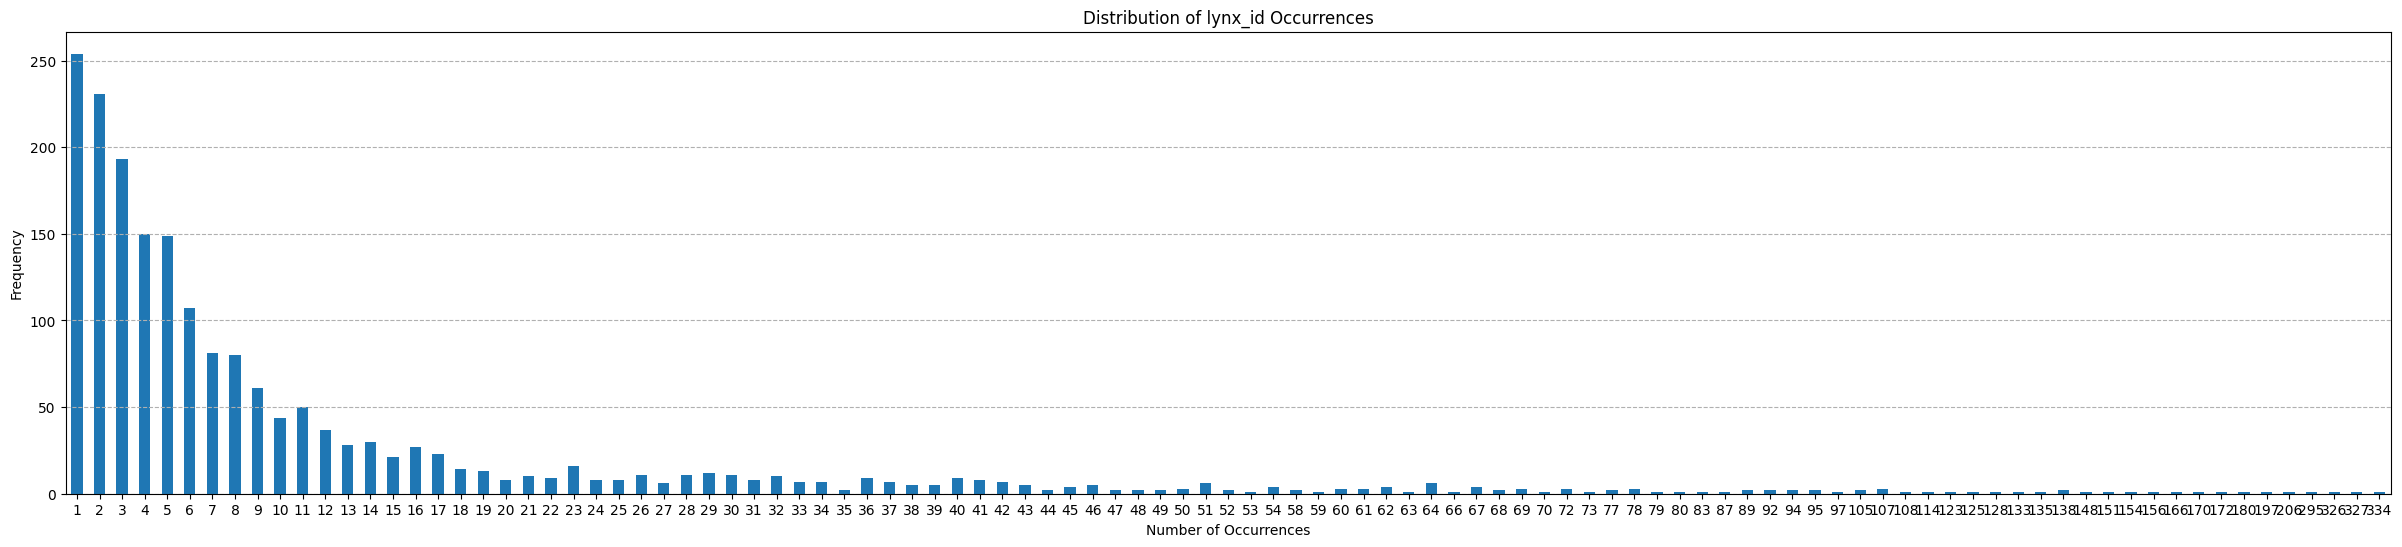

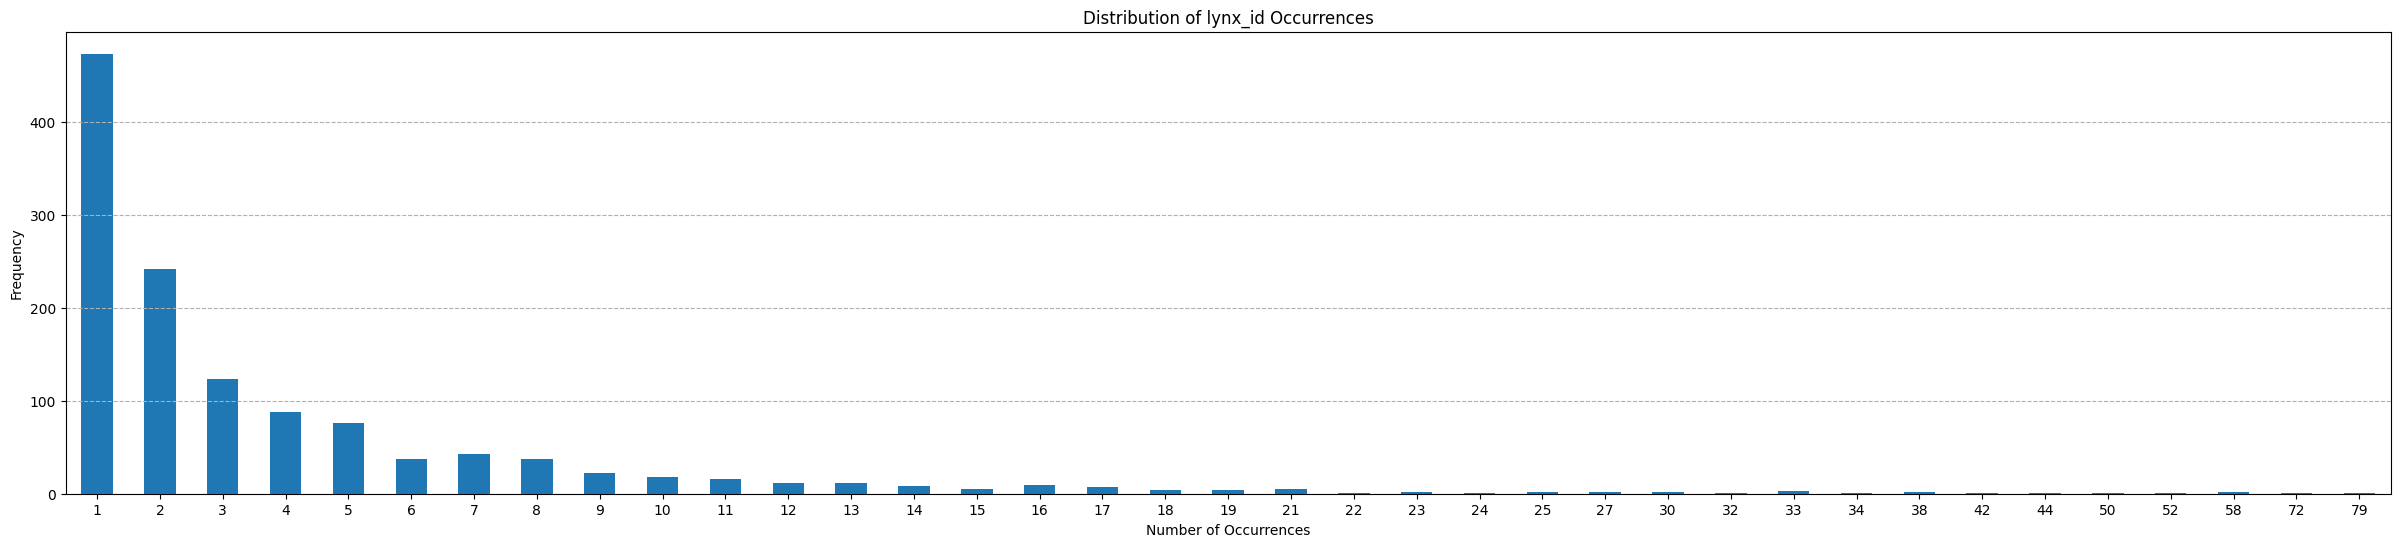

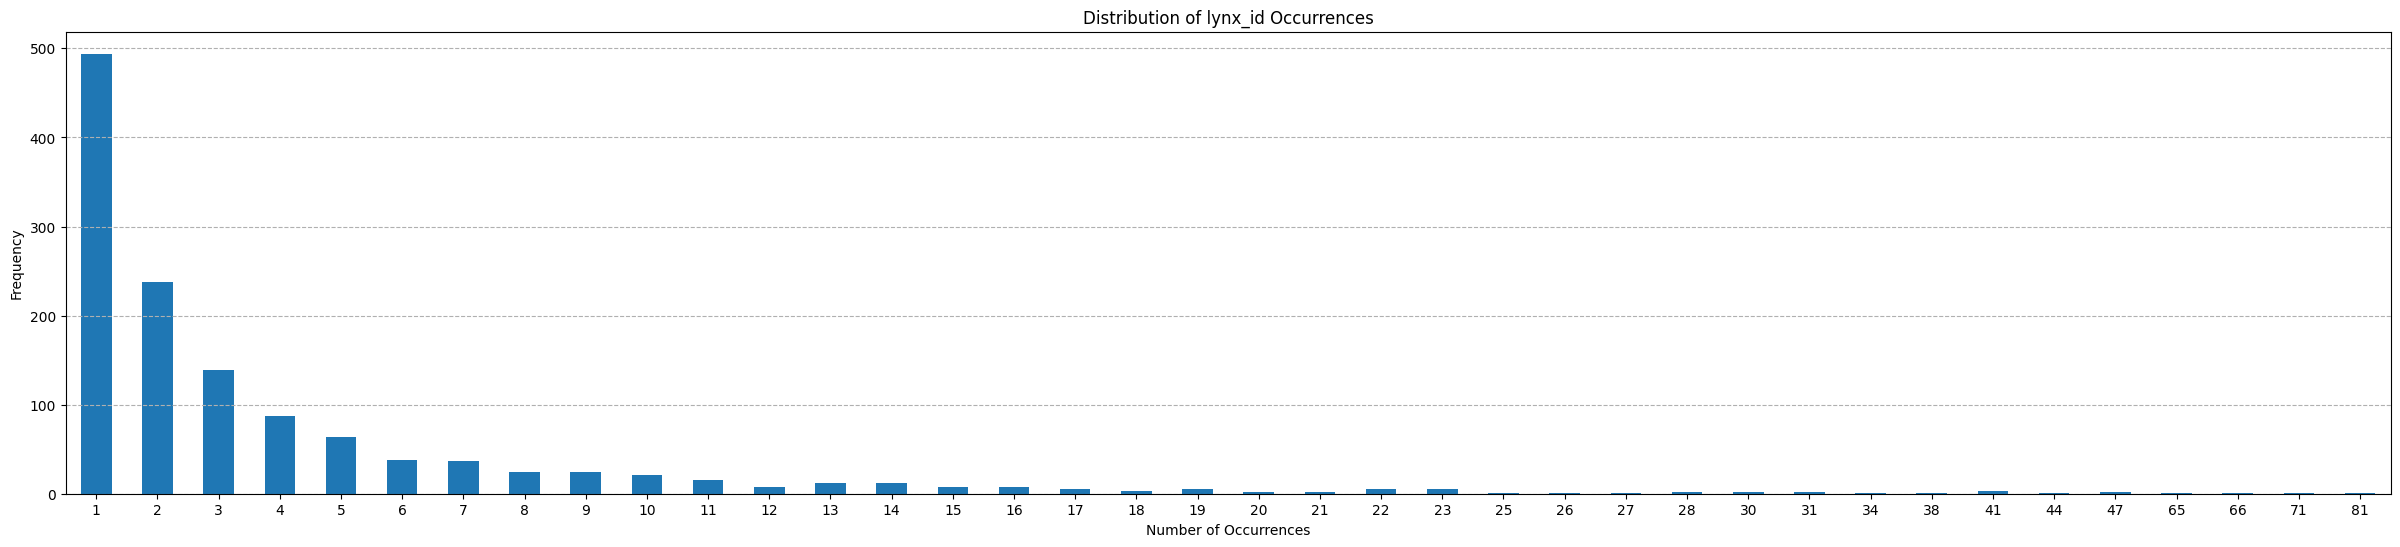

In [3]:
from lynx_id.utils.split_dataset import naive_split_dataset

# Assuming dataset_csv is defined and points to the path of your dataset
train_df, val_df, test_df = naive_split_dataset(dataset_csv, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42)

# Instead of just printing the length, add a description to make it clear what's being printed
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the test set: {len(test_df)}")

plot_occurrence_distribution(train_df, 'lynx_id')
plot_occurrence_distribution(val_df, 'lynx_id')
plot_occurrence_distribution(test_df, 'lynx_id')

### Advanced split

Number of samples in the training set: 19220
Number of samples in the validation set: 7851
Number of samples in the test set: 8673


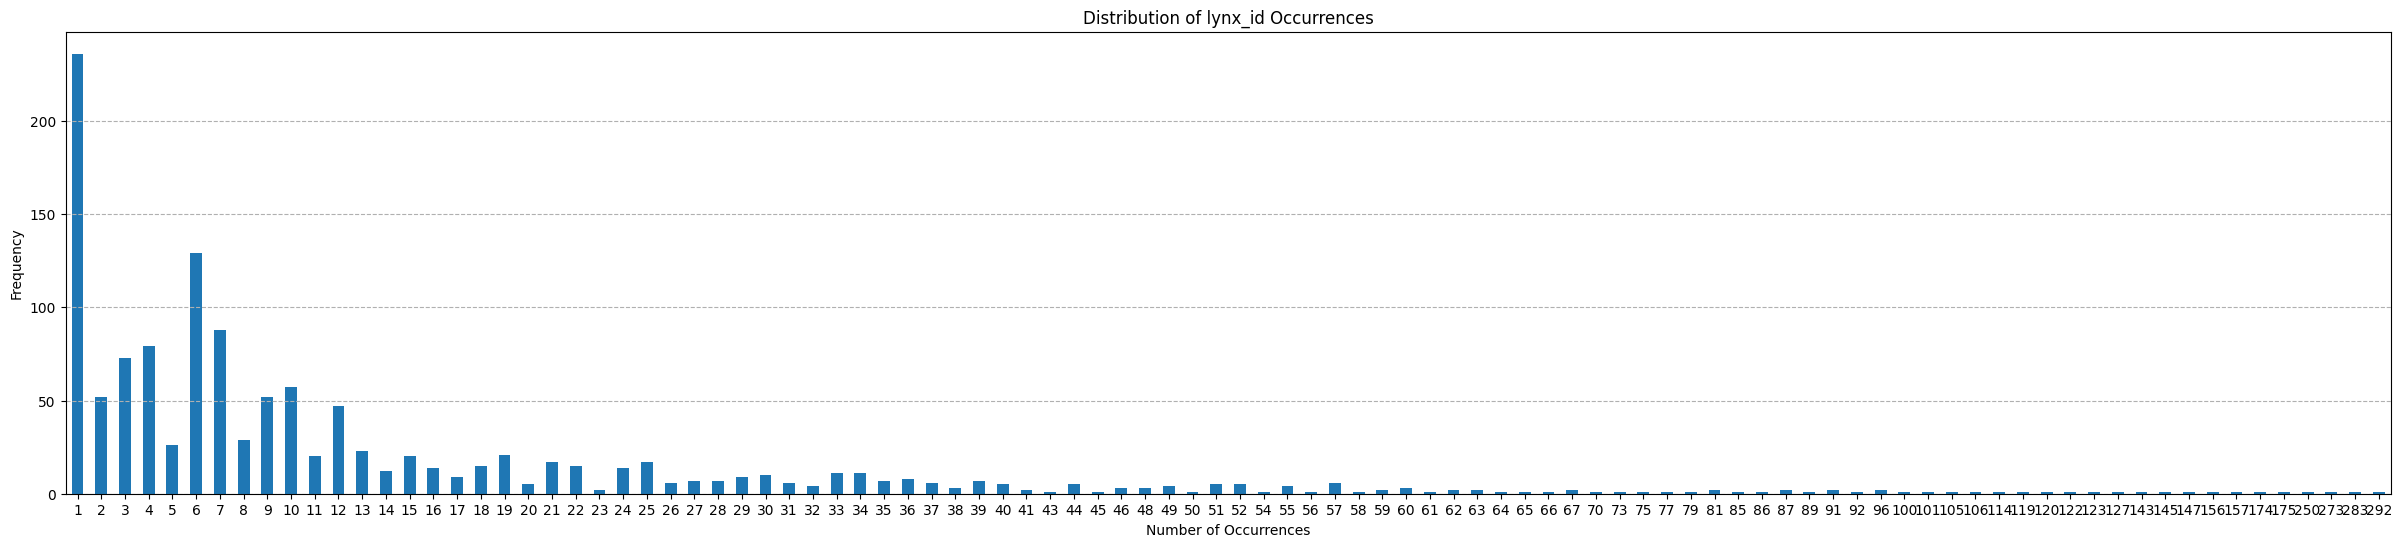

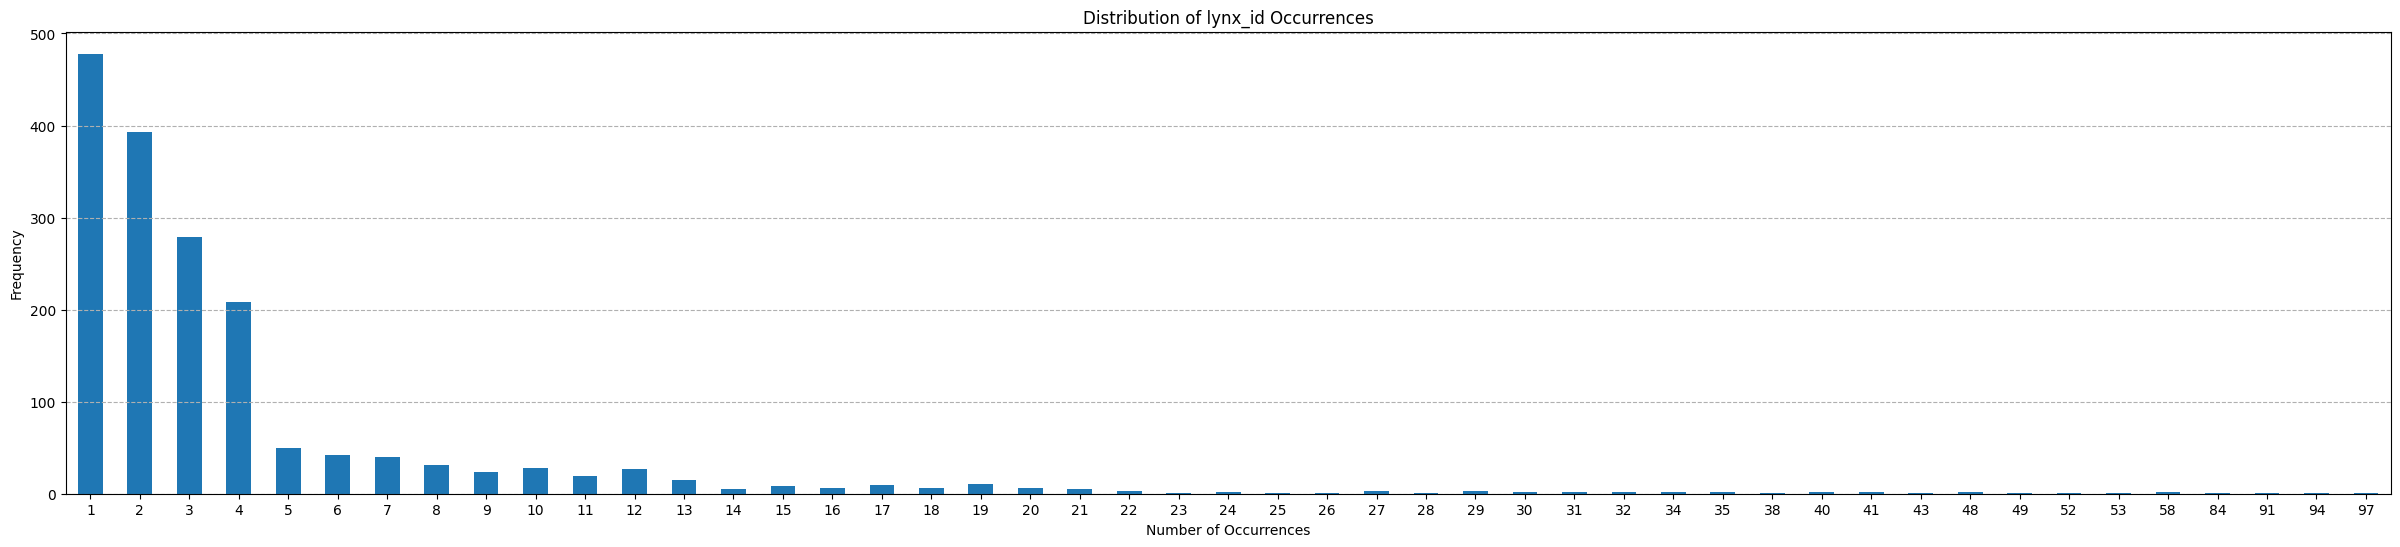

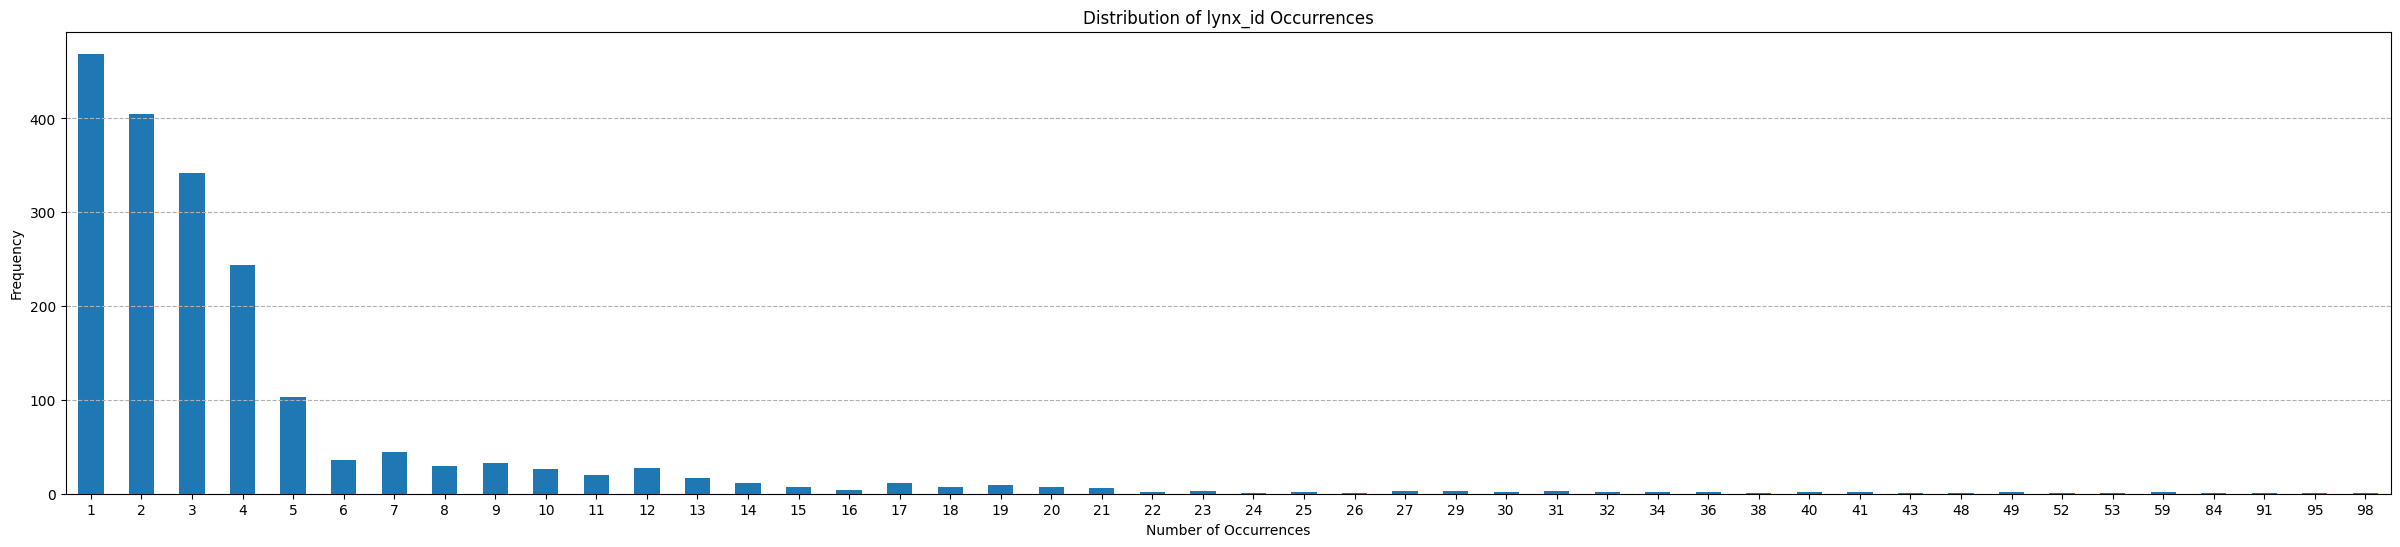

In [4]:
from lynx_id.utils.split_dataset import complex_split_dataset
train_df, val_df, test_df, complete_df = complex_split_dataset(df, 
                                                               threshold=10, 
                                                               high_occurrence_ratios=(0.6, 0.2, 0.2), 
                                                               low_occurrence_ratios=(0.6, 0.2, 0.2), 
                                                               unseen_ratio=0.6, 
                                                               random_seed=42)


# Instead of just printing the length, add a description to make it clear what's being printed
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the test set: {len(test_df)}")

plot_occurrence_distribution(train_df, 'lynx_id')
plot_occurrence_distribution(val_df, 'lynx_id')
plot_occurrence_distribution(test_df, 'lynx_id')

In [5]:
complete_df[complete_df["set"]=="val"].head()
complete_df[complete_df["lynx_id_visibility"]=="seen"].head()


,filepath,lynx_id,source,pattern,date,location,image_number,conf,x,y,...,filepath_no_bg,score_sam,number_animals,number_children,sex,side,latitude,longitude,set,lynx_id_visibility
0,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,21.0,0.923,766.8752,993.98400,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.952402,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
1,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,3.0,0.978,842.9568,670.92480,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.965796,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
2,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,173.0,0.979,450.9696,119.99232,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.982738,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
3,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,109.0,0.913,389.9392,448.97280,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.975082,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
4,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,66.0,0.928,589.8240,614.86080,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.979210,NaN,NaN,NaN,NaN,NaN,NaN,train,seen


In [6]:
train_df = complete_df[complete_df["set"]=="train"]
val_df = complete_df[complete_df["set"]=="val"]
test_df = complete_df[complete_df["set"]=="test"]

In [7]:
complete_df.groupby('set')['lynx_id_visibility'].value_counts()

set    lynx_id_visibility
test   seen                   7018
       unseen                 1655
train  seen                  19220
val    seen                   6536
       unseen                 1315
Name: count, dtype: int64

In [11]:
nb_total_lynxes = len(complete_df['lynx_id'].value_counts())

print(f"All | number of images: {complete_df.shape[0]}")
print(f"All | number of lynxes: {nb_total_lynxes}")

All | number of images: 35744
All | number of lynxes: 1976


In [13]:
train_lynx_id = set(train_df['lynx_id'].tolist())

print(f"Train | number of images: {train_df.shape[0]}")
print(f"Train | number of lynxes: {len(train_lynx_id)}")

Train | number of images: 19220
Train | number of lynxes: 1275


In [17]:
nb_images = val_df.shape[0]
nb_lynxes = len(val_df['lynx_id'].value_counts())
val_lynx_id = set(val_df['lynx_id'].tolist())
nb_lynxes_not_in_training = len(val_lynx_id - train_lynx_id)
nb_new_images = len(val_df[val_df['lynx_id_visibility'] == 'unseen'])

print(f"Val | number of images: {nb_images}")
print(f"Val | number of lynxes: {nb_lynxes}")
print(f'Val | number of lynx_ids (not images) not seen in the training set (=New): {nb_lynxes_not_in_training} ({round(nb_lynxes_not_in_training / nb_total_lynxes, 2)}%)')
print(f"Val | number of New images: {nb_new_images} ({round(nb_new_images / nb_images, 2)}%)")

Val | number of images: 7851
Val | number of lynxes: 1732
Val | number of lynx_ids (not images) not seen in the training set: 621 (0.31%)
Val | number of New images: 1315 (0.17%)


In [20]:
nb_images = test_df.shape[0]
nb_lynxes = len(test_df['lynx_id'].value_counts())
test_lynx_id = set(test_df['lynx_id'].tolist())
nb_lynxes_not_in_training = len(test_lynx_id - train_lynx_id)
nb_new_images = len(test_df[test_df['lynx_id_visibility'] == 'unseen'])

print(f"Test | number of images: {nb_images}")
print(f"Test | number of lynxes: {nb_lynxes}")
print(f'Test | number of lynx_ids (not images) not seen in the training set (=New): {nb_lynxes_not_in_training} ({round(nb_lynxes_not_in_training / nb_total_lynxes, 2)}%)')
print(f"Test | number of New images: {nb_new_images} ({round(nb_new_images / nb_images, 2)}%)")

Test | number of images: 8673
Test | number of lynxes: 1901
Test | number of lynx_ids (not images) not seen in the training set (=New): 701 (0.35%)
Test | number of New images: 1655 (0.19%)


## In practice: Splitting using the dataset class

### Using the `split` method

In [21]:
from lynx_id.data.dataset import LynxDataset
dataset = LynxDataset(dataset_csv=train_df, loader="pil", mode="single")

input, output = dataset[0]  # Example for getting the first item

# Accessing data
image = input['image']
lynx_id = output['lynx_id']

In [22]:
train_set, val_set, test_set= dataset.split()
print(len(train_set))
print(len(val_set))
print(len(test_set))

14921
1877
2422


### Using the `set` parameter

In [7]:
from pathlib import Path
from lynx_id.data.dataset import LynxDataset
dataset_csv = Path('/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full.csv')

dataset = LynxDataset(dataset_csv=dataset_csv, set="test", loader="pil", mode="single")

input, output = dataset[0]  # Example for getting the first item

# Accessing data
image = input['image']
lynx_id = output['lynx_id']
print(len(dataset))

/gpfsdswork/projects/rech/ads/ssos023/DP-SCR_Identify-and-estimate-density-lynx-population/lynx_id/data/dataset.py:45: UserWarning: The 'set' column was not found in the dataset. Proceeding to split the dataset based on provided parameters.
  warnings.warn("The 'set' column was not found in the dataset. Proceeding to split the dataset based on provided parameters.")


1366


## Save csv files

In [21]:
import pandas as pd
import os
folder_path = Path("/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/balanced_csv")
file_prefix = "lynx_id_balanced"
train_path = os.path.join(folder_path, file_prefix + "_train.csv")
val_path = os.path.join(folder_path, file_prefix + "_val.csv")
test_path = os.path.join(folder_path, file_prefix + "_test.csv")
train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)